In [1]:
# 📦 Manipulasi Data
import pandas as pd
import numpy as np

# 📊 Visualisasi Data (Opsional, untuk eksplorasi & demo)
import matplotlib.pyplot as plt
import seaborn as sns

# 🧼 Preprocessing Teks
import re
import string

# 🧠 NLP dan Vektorisasi
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# 🛠️ Ekstra (opsional, untuk evaluasi)
from sklearn.metrics import precision_score, recall_score  # jika ada ground truth

# 🔒 Optional: Supresi warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset (ganti path jika file lokal atau drive)
df = pd.read_csv('/content/amazon.csv')  # atau sesuaikan path sesuai lokasi file

In [3]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [5]:
df.describe(include='all')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B083342NKJ,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Borosil-Jumbo-1000-Watt-...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


In [6]:
# Kolom penting yang akan digunakan untuk content-based filtering
important_columns = [
    'product_id', 'user_id', 'product_name', 'category', 'about_product',
    'discounted_price', 'rating', 'rating_count', 'review_content'
]

df = df[important_columns]
df.head()

,product_id,user_id,product_name,category,about_product,discounted_price,rating,rating_count,review_content
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,₹399,4.2,"24,269",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...",₹199,4.0,"43,994",I ordered this cable to connect my phone to An...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,₹199,3.9,"7,928","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,₹329,4.2,"94,363","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹154,4.2,"16,905","Bought this instead of original apple, does th..."


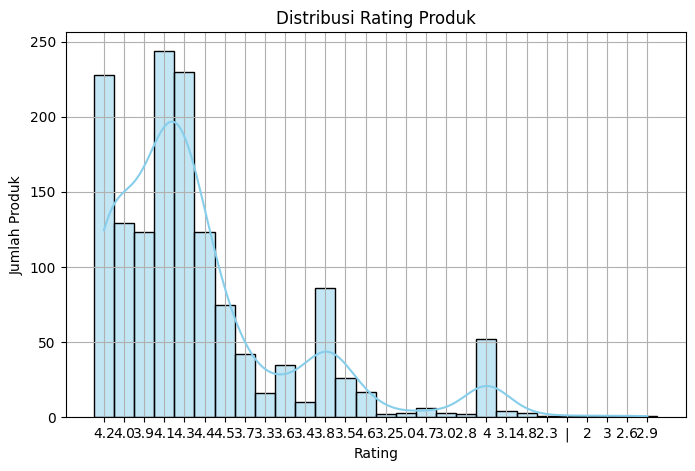

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi nilai rating
plt.figure(figsize=(8,5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating Produk')
plt.xlabel('Rating')
plt.ylabel('Jumlah Produk')
plt.grid(True)
plt.show()

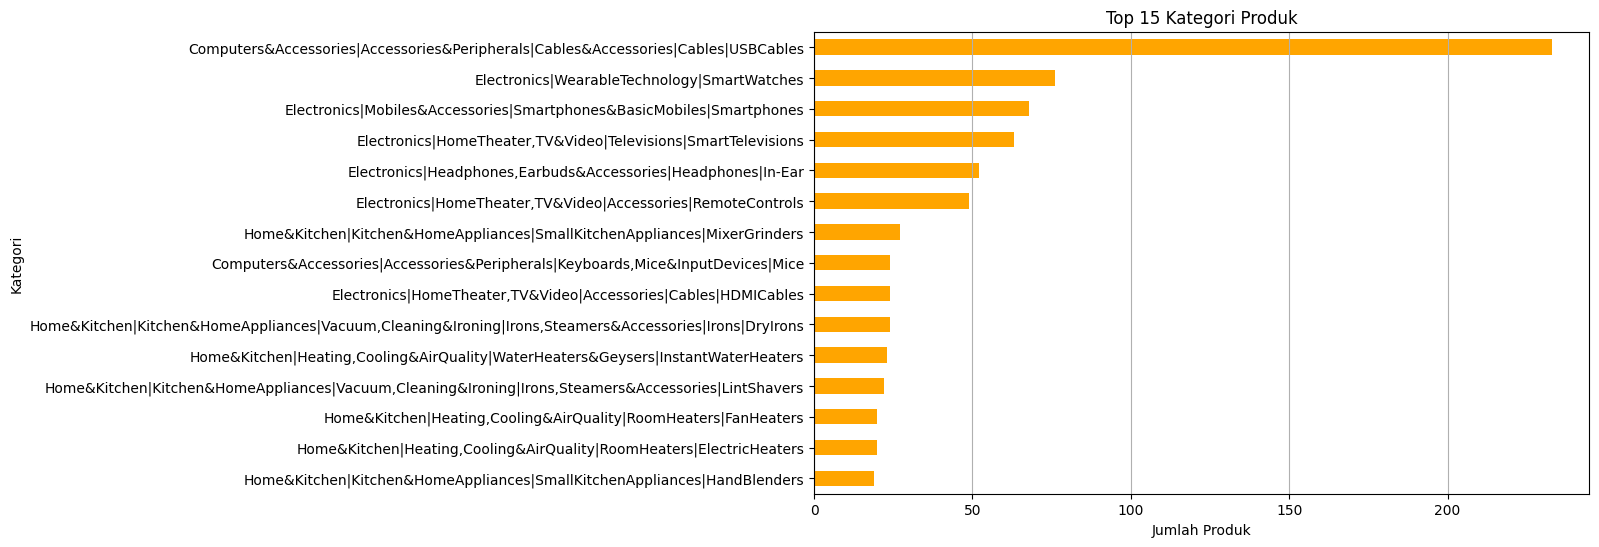

In [8]:
# Hitung jumlah produk per kategori (top 15)
plt.figure(figsize=(10,6))
df['category'].value_counts().head(15).plot(kind='barh', color='orange')
plt.title('Top 15 Kategori Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

In [9]:
# Pilih ulang hanya kolom yang benar-benar akan digunakan
df = df[['product_id', 'product_name', 'category', 'about_product', 'discounted_price', 'rating', 'review_content']]
df.head()

,product_id,product_name,category,about_product,discounted_price,rating,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,High Compatibility : Compatible With iPhone 12...,₹399,4.2,Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"Compatible with all Type C enabled devices, be...",₹199,4.0,I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,【 Fast Charger& Data Sync】-With built-in safet...,₹199,3.9,"Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,The boAt Deuce USB 300 2 in 1 cable is compati...,₹329,4.2,"Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,[CHARGE & SYNC FUNCTION]- This cable comes wit...,₹154,4.2,"Bought this instead of original apple, does th..."


In [10]:
list_produk = ['product_id', 'product_name', 'category', 'about_product']
null_value = df[list_produk].isnull().sum()
dupllicate_value = df[list_produk].duplicated().sum()
print("Jumlah data hilang")
print("-"*20)
print(null_value)
print("-"*20)
print("Jumlah data duplikat")
print(dupllicate_value)

Jumlah data hilang
--------------------
product_id       0
product_name     0
category         0
about_product    0
dtype: int64
--------------------
Jumlah data duplikat
110


In [11]:
# Hapus baris yang memiliki missing values di kolom penting
df.dropna(subset=['product_id', 'product_name', 'category', 'about_product'], inplace=True)

# Hapus duplikasi berdasarkan product_id (asumsi satu produk unik)
df.drop_duplicates(subset='product_id', inplace=True)

# Reset index agar rapi
df.reset_index(drop=True, inplace=True)

print("Jumlah data setelah cleaning:", len(df))

Jumlah data setelah cleaning: 1351


In [12]:
# Fungsi bersihkan dan normalisasi teks
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', ' ', text)  # hapus HTML tag
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)  # hapus simbol
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

# Terapkan pada kolom teks
df['product_name'] = df['product_name'].apply(clean_text)
df['about_product'] = df['about_product'].apply(clean_text)
df['category'] = df['category'].apply(clean_text)

In [13]:
# Gabungkan tiga fitur teks utama menjadi satu kolom
df['combined_features'] = df['product_name'] + ' ' + df['about_product'] + ' ' + df['category']

# Tampilkan contoh hasil
df[['product_name', 'about_product', 'category', 'combined_features']].head()

,product_name,about_product,category,combined_features
0,wayona nylon braided usb to lightning fast cha...,high compatibility compatible with iphone 12 1...,computers accessories accessories peripherals ...,wayona nylon braided usb to lightning fast cha...
1,ambrane unbreakable 60w 3a fast charging 1 5m ...,compatible with all type c enabled devices be ...,computers accessories accessories peripherals ...,ambrane unbreakable 60w 3a fast charging 1 5m ...
2,sounce fast phone charging cable data sync usb...,fast charger data sync with built in safety pr...,computers accessories accessories peripherals ...,sounce fast phone charging cable data sync usb...
3,boat deuce usb 300 2 in 1 type c micro usb str...,the boat deuce usb 300 2 in 1 cable is compati...,computers accessories accessories peripherals ...,boat deuce usb 300 2 in 1 type c micro usb str...
4,portronics konnect l 1 2m fast charging 3a 8 p...,charge sync function this cable comes with cha...,computers accessories accessories peripherals ...,portronics konnect l 1 2m fast charging 3a 8 p...


In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

# Fungsi preprocessing lanjutan
def preprocess_text(text):
    tokens = word_tokenize(text)  # tokenizing
    tokens = [word for word in tokens if word not in stop_words]  # stopword removal
    return ' '.join(tokens)

# Terapkan ke combined_features
df['processed_features'] = df['combined_features'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Melakukan perhitungan idf dan transformasi ke bentuk matrix
tfidf_matrix = tfidf.fit_transform(df['processed_features']).toarray()

# Cetak ukuran matrix TF-IDF
print("Ukuran matriks TF-IDF:", tfidf_matrix.shape)
print('-' * 75)
tfidf_matrix

Ukuran matriks TF-IDF: (1351, 5000)
---------------------------------------------------------------------------


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08404791, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

# Hitung cosine similarity antar produk
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Ukuran similarity matrix:", similarity_matrix.shape)

Ukuran similarity matrix: (1351, 1351)


In [95]:
cosine_sim = cosine_similarity(similarity_matrix)
cosine_sim

array([[1.        , 0.67073025, 0.85674434, ..., 0.15235226, 0.2510179 ,
        0.20517946],
       [0.67073025, 1.        , 0.78953929, ..., 0.12449836, 0.21479396,
        0.24456671],
       [0.85674434, 0.78953929, 1.        , ..., 0.19062128, 0.29998292,
        0.27145646],
       ...,
       [0.15235226, 0.12449836, 0.19062128, ..., 1.        , 0.61597904,
        0.36691219],
       [0.2510179 , 0.21479396, 0.29998292, ..., 0.61597904, 1.        ,
        0.39708597],
       [0.20517946, 0.24456671, 0.27145646, ..., 0.36691219, 0.39708597,
        1.        ]])

In [ ]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

# Menggunakan df instead of data

# --- START Correction ---
# Clean 'discounted_price' column by removing non-numeric characters before converting to float
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False)
df['discounted_price'] = df['discounted_price'].str.replace(',', '', regex=False)
df['discounted_price'] = df['discounted_price'].astype(float)
# --- END Correction ---


# Buat matriks fitur numerik
# Hanya menggunakan 'discounted_price' as 'actual_price' and 'discount_percentage' are not in the current df
numeric_features = df[['discounted_price']].values

# Gabungkan fitur numerik dengan matriks TF-IDF
numeric_features_sparse = csr_matrix(numeric_features)  # Konversi ke sparse matrix
combined_features = hstack([tfidf_matrix, numeric_features_sparse])

# Lihat dimensi matriks gabungan
print(f"Dimensi matriks gabungan: {combined_features.shape}")

In [96]:
def get_recommendations(product_name, top_n=10):
    # Ubah input jadi lowercase dan strip spasi
    product_name = product_name.lower().strip()

    # Temukan semua produk yang mengandung string tersebut
    matched_products = df[df['product_name'].str.lower().str.contains(product_name)]

    if matched_products.empty:
        return f"Produk '{product_name}' tidak ditemukan dalam database."

    # Ambil indeks produk pertama yang cocok (bukan semua)
    idx = matched_products.index[0]

    # Hitung skor similarity terhadap semua produk lain
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Urutkan dari yang paling mirip
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Ambil top_n produk (kecuali dirinya sendiri)
    sim_scores = sim_scores[1:top_n+1]

    # Ambil indeks produk hasil rekomendasi
    product_indices = [i[0] for i in sim_scores]

    # Tampilkan hasil rekomendasi
    return df[['product_name', 'category', 'discounted_price', 'rating']].iloc[product_indices]

In [97]:
recommended_product = get_recommendations("adapter", top_n=10)
recommended_product

,product_name,category,discounted_price,rating
35,ptron solero mb301 3a micro usb data charging ...,computers accessories accessories peripherals ...,99.0,3.9
300,lava charging adapter elements d3 2a fast char...,computers accessories accessories peripherals ...,129.0,3.7
34,ptron solero t351 3 5amps fast charging type c...,computers accessories accessories peripherals ...,199.0,3.9
109,ptron solero t241 2 4a type c data charging us...,computers accessories accessories peripherals ...,99.0,3.9
285,ptron solero t241 2 4a type c data charging us...,computers accessories accessories peripherals ...,99.0,3.9
248,croma 3a fast charge 1m type c to all type c p...,computers accessories accessories peripherals ...,129.0,3.9
468,flix beetel usb to type c pvc data sync 2a sma...,computers accessories accessories peripherals ...,139.0,4.0
81,flix beetel usb to type c pvc data sync and 2a...,computers accessories accessories peripherals ...,139.0,4.0
176,flix beetel usb to type c pvc data sync 15w 3a...,computers accessories accessories peripherals ...,88.0,4.0
277,amazon brand solimo 3a fast charging tough typ...,computers accessories accessories peripherals ...,119.0,3.8


In [99]:
print("🔍 Rekomendasi untuk produk dengan keyword: 'usb'\n")
display(get_recommendations("adapter", top_n=10))

🔍 Rekomendasi untuk produk dengan keyword: 'usb'



,product_name,category,discounted_price,rating
35,ptron solero mb301 3a micro usb data charging ...,computers accessories accessories peripherals ...,99.0,3.9
300,lava charging adapter elements d3 2a fast char...,computers accessories accessories peripherals ...,129.0,3.7
34,ptron solero t351 3 5amps fast charging type c...,computers accessories accessories peripherals ...,199.0,3.9
109,ptron solero t241 2 4a type c data charging us...,computers accessories accessories peripherals ...,99.0,3.9
285,ptron solero t241 2 4a type c data charging us...,computers accessories accessories peripherals ...,99.0,3.9
248,croma 3a fast charge 1m type c to all type c p...,computers accessories accessories peripherals ...,129.0,3.9
468,flix beetel usb to type c pvc data sync 2a sma...,computers accessories accessories peripherals ...,139.0,4.0
81,flix beetel usb to type c pvc data sync and 2a...,computers accessories accessories peripherals ...,139.0,4.0
176,flix beetel usb to type c pvc data sync 15w 3a...,computers accessories accessories peripherals ...,88.0,4.0
277,amazon brand solimo 3a fast charging tough typ...,computers accessories accessories peripherals ...,119.0,3.8


In [104]:
# Fungsi Precision@K
def precision_at_k(recommended_list, relevant_list, k):
    recommended_k = recommended_list[:k]
    relevant_set = set(relevant_list)
    hits = sum([1 for item in recommended_k if item in relevant_set])
    return hits / k

# Fungsi Recall@K
def recall_at_k(recommended_list, relevant_list, k):
    recommended_k = recommended_list[:k]
    relevant_set = set(relevant_list)
    hits = sum([1 for item in recommended_k if item in relevant_set])
    return hits / len(relevant_set) if relevant_set else 0

# Fungsi MAP@K
def average_precision_at_k(recommended_list, relevant_list, k):
    relevant_set = set(relevant_list)
    hits = 0
    sum_precisions = 0
    for i, item in enumerate(recommended_list[:k], start=1):
        if item in relevant_set:
            hits += 1
            sum_precisions += hits / i
    return sum_precisions / min(len(relevant_set), k) if relevant_set else 0


In [109]:
# Ambil produk pertama yang mengandung kata "adapter"
test_product_index = df[df['product_name'].str.contains("adapter", case=False)].index[0]
test_product_name = df.loc[test_product_index, 'product_name']
print(f"📌 Evaluasi untuk produk: {test_product_name.split}")

# Ambil top 10 rekomendasi dari sistem
recommended_products = get_recommendations(test_product_name, top_n=10)
recommended_names = recommended_products['product_name'].tolist()

# Buat daftar produk relevan (misal dari keyword sama: "usb")
relevant_products = df[df['product_name'].str.contains("usb", case=False)]
relevant_names = relevant_products['product_name'].tolist()

# Hilangkan produk aslinya jika ada di daftar relevan
relevant_names = [name for name in relevant_names if name != test_product_name]

# Evaluasi
k = 10
prec = precision_at_k(recommended_names, relevant_names, k)
rec = recall_at_k(recommended_names, relevant_names, k)
map_score = average_precision_at_k(recommended_names, relevant_names, k)

print(f"\n📊 Evaluasi Hasil Rekomendasi:")
print(f"✅ Precision@{k}: {prec:.2f}")
print(f"✅ Recall@{k}: {rec:.2f}")
print(f"✅ MAP@{k}: {map_score:.2f}")

📌 Evaluasi untuk produk: <built-in method split of str object at 0x7a423a1a56b0>

📊 Evaluasi Hasil Rekomendasi:
✅ Precision@10: 0.90
✅ Recall@10: 0.03
✅ MAP@10: 0.85
